In [5]:
import pandas as pd
from IPython.display import display
from IPython.display import Image

# df = pd.read_csv('latimes-place-totals.csv')
df = pd.read_csv('latimes-place-totals2101.csv')
#print(df)

lacountydata = df.loc[df['county'] == 'Los Angeles']
print(lacountydata)

# pd.unique(lacountydata['place'])

              date       county  fips            place  confirmed_cases note  \
239     2021-01-23  Los Angeles  37.0            Acton              373  NaN   
240     2021-01-23  Los Angeles  37.0  Adams-Normandie             1017  NaN   
241     2021-01-23  Los Angeles  37.0     Agoura Hills              820  NaN   
242     2021-01-23  Los Angeles  37.0       Agua Dulce              197  NaN   
243     2021-01-23  Los Angeles  37.0         Alhambra             5876  NaN   
...            ...          ...   ...              ...              ...  ...   
306637  2020-03-16  Los Angeles  37.0       West Adams                1  NaN   
306638  2020-03-16  Los Angeles  37.0       West Hills                3  NaN   
306639  2020-03-16  Los Angeles  37.0   West Hollywood                5  NaN   
306640  2020-03-16  Los Angeles  37.0      West Vernon                1  NaN   
306641  2020-03-16  Los Angeles  37.0      Westchester                1  NaN   

                 x          y  populati

In [6]:
regions = lacountydata.place.unique()
print(regions)
print(len(regions))

print(lacountydata.groupby('place').first())
# lacountydata.to_csv('lacountydataGroupbyPlace.csv')
print(lacountydata.iloc[:,[0,3,4,6,7]])




['Acton' 'Adams-Normandie' 'Agoura Hills' 'Agua Dulce' 'Alhambra' 'Alsace'
 'Altadena' 'Anaverde' 'Angeles National Forest' 'Angelino Heights'
 'Arcadia' 'Arleta' 'Artesia' 'Athens Village' 'Athens-Westmont'
 'Atwater Village' 'Avalon' 'Avocado Heights' 'Azusa' 'Baldwin Hills'
 'Baldwin Park' 'Bassett' 'Bel Air' 'Bell' 'Bell Gardens' 'Bellflower'
 'Beverly Crest' 'Beverly Hills' 'Beverlywood' 'Bouquet Canyon'
 'Boyle Heights' 'Bradbury' 'Brentwood' 'Brookside' 'Burbank'
 'Cadillac-Corning' 'Calabasas' 'Canoga Park' 'Canyon Country' 'Carson'
 'Carthay' 'Castaic' 'Central' 'Century City' 'Century Palms/Cove'
 'Cerritos' 'Chatsworth' 'Cheviot Hills' 'Chinatown' 'Claremont'
 'Cloverdale/Cochran' 'Commerce' 'Compton' 'Country Club Park' 'Covina'
 'Covina (Charter Oak)' 'Crenshaw District' 'Crestview' 'Cudahy'
 'Culver City' 'Del Aire' 'Del Rey' 'Del Sur' 'Desert View Highlands'
 'Diamond Bar' 'Downey' 'Downtown' 'Duarte' 'Eagle Rock' 'East Covina'
 'East Hollywood' 'East La Mirada' 'East La

In [7]:
# #task 2
# population = pd.read_csv('city_community_table-2.csv').iloc[:,[1,2,11]]
population = pd.read_csv('LAtimesNeighborhoodPop.csv')
#print(df.geo_merge.unique())
population['neighborhood'] = population['neighborhood'].str.lower() 
population['neighborhood'] = population['neighborhood'].str.replace('-', ' ')
population=population[population.population != -1]
# population['geo_merge'] = population['geo_merge'].str.replace('City of ', '')
# population['geo_merge'] = population['geo_merge'].str.replace('Los Angeles -', '')
#print(df.geo_merge.unique())
print(population)

popset = set(population.neighborhood)
lacountydata = lacountydata.rename(columns={'x': 'Longitude', 'y': 'Latitude'})
lacountydata['place'] = lacountydata['place'].str.lower() 
lacountydata['place'] = lacountydata['place'].str.replace('-', ' ')
lacountyset = set(lacountydata.place)
print(len(popset))
print(len(lacountyset))

print("set1 Intersect set2 size: ", len(popset.intersection(lacountyset)))
print("set1 Intersect set2 : ", popset.intersection(lacountyset))
print ("set1 has, but set2 dont have: ",popset.difference(lacountyset)) 
print ("set2 has, but set1 dont have: ",lacountyset.difference(popset)) 

comb = pd.merge(population, lacountydata, left_on='neighborhood', right_on='place',how='inner')
print(comb)
# print(len(set(comb.place)))
print(comb.iloc[:,[2,0,6,1,8,9]])




        neighborhood  population
0              acton        6522
1    adams normandie       17596
2       agoura hills       20324
3         agua dulce        3130
4           alhambra       85961
..               ...         ...
267      willowbrook       34336
268       wilmington       51517
269   windsor square        5642
270         winnetka       46943
271   woodland hills       59661

[265 rows x 2 columns]
265
342
set1 Intersect set2 size:  215
set1 Intersect set2 :  {'west hollywood', 'calabasas', 'florence firestone', 'hyde park', 'green meadows', 'century city', 'duarte', 'harbor gateway', 'del rey', 'la crescenta montrose', 'highland park', 'elysian valley', 'west puente valley', 'walnut', 'gardena', 'industry', 'winnetka', 'hermosa beach', 'south el monte', 'hancock park', 'woodland hills', 'willowbrook', 'el sereno', 'irwindale', 'bel air', 'avalon', 'leimert park', 'monrovia', 'san dimas', 'lake los angeles', 'burbank', 'beverly hills', 'rosemead', 'vernon', 'west cars

             date    neighborhood  confirmed_cases  population_x   Longitude  \
0      2021-01-23           acton              373          6522 -118.216138   
1      2021-01-22           acton              373          6522 -118.216138   
2      2021-01-21           acton              371          6522 -118.216138   
3      2021-01-20           acton              370          6522 -118.216138   
4      2021-01-19           acton              369          6522 -118.216138   
...           ...             ...              ...           ...         ...   
63872  2020-03-21  woodland hills                5         59661 -118.604522   
63873  2020-03-20  woodland hills                4         59661 -118.604522   
63874  2020-03-19  woodland hills                3         59661 -118.604522   
63875  2020-03-18  woodland hills                3         59661 -118.604522   
63876  2020-03-17  woodland hills                2         59661 -118.604522   

        Latitude  
0      34.481366  
1

In [8]:
daily = comb.iloc[:,[2,0,6,1,8,9]]
daily

,date,neighborhood,confirmed_cases,population_x,Longitude,Latitude
0,2021-01-23,acton,373,6522,-118.216138,34.481366
1,2021-01-22,acton,373,6522,-118.216138,34.481366
2,2021-01-21,acton,371,6522,-118.216138,34.481366
3,2021-01-20,acton,370,6522,-118.216138,34.481366
4,2021-01-19,acton,369,6522,-118.216138,34.481366
...,...,...,...,...,...,...
63872,2020-03-21,woodland hills,5,59661,-118.604522,34.166350
63873,2020-03-20,woodland hills,4,59661,-118.604522,34.166350
63874,2020-03-19,woodland hills,3,59661,-118.604522,34.166350
63875,2020-03-18,woodland hills,3,59661,-118.604522,34.166350


In [10]:
import numpy as np
daily.sort_values(['neighborhood', 'date'], inplace=True)
daily['new_cases'] = daily['confirmed_cases'].diff()
mask = daily.neighborhood != daily.neighborhood.shift(1)
daily['new_cases'][mask] = 0
daily.sort_values(['neighborhood', 'date'], inplace=True, ascending=[True,False])
daily['new_cases'] = daily['new_cases'].apply(np.int64)
#assumption: make all negative numbers 0
daily.loc[daily.new_cases <0, 'new_cases'] = 0
daily.to_csv('DailyInfection.csv')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [11]:
daily

,date,neighborhood,confirmed_cases,population_x,Longitude,Latitude,new_cases
0,2021-01-23,acton,373,6522,-118.216138,34.481366,0
1,2021-01-22,acton,373,6522,-118.216138,34.481366,2
2,2021-01-21,acton,371,6522,-118.216138,34.481366,1
3,2021-01-20,acton,370,6522,-118.216138,34.481366,1
4,2021-01-19,acton,369,6522,-118.216138,34.481366,3
...,...,...,...,...,...,...,...
63872,2020-03-21,woodland hills,5,59661,-118.604522,34.166350,1
63873,2020-03-20,woodland hills,4,59661,-118.604522,34.166350,1
63874,2020-03-19,woodland hills,3,59661,-118.604522,34.166350,0
63875,2020-03-18,woodland hills,3,59661,-118.604522,34.166350,1


In [12]:
# two_hours = pd.Timedelta(hours=2)
from datetime import datetime

# dates = (daily["date"]+pd.Timedelta(hours=2)).dt.date
# daily["cum_sum"] = daily["confirmed_cases"].iloc[::-1].groupby(dates).cumsum()
# # print(daily)
# dates
# pd.Timedelta(days=0)+daily["date"]
# print(type(daily["date"][0]))
# datetime.strptime(daily["date"][0], '%Y-%m-%d').date()
# print(type(datetime.strptime(daily["date"][0], '%Y-%m-%d').date()))
daily.loc[:,'date'] =  pd.to_datetime(daily.loc[:,'date'], format='%Y-%m-%d')
# daily['date']
# daily.loc[:,"cum_sum"] = daily.loc[:,"confirmed_cases"].iloc[::-1].groupby(daily.loc[:,'neighborhood']).cumsum()

# daily.to_csv('NeighborhoodDailyCumsum.csv')
# daily.tail(10)

In [13]:
d = daily.rename(columns = {'confirmed_cases':'cumulative_cases'})
d
d.iloc[:,[0,1,6,2]].to_csv('Regional_infection_data.csv')

In [9]:
lastDates = ['2020-06-14','2020-05-31','2020-04-30','2020-03-31']
# endOfMonth 
# endOfMonth
june = daily[daily['date'].isin(['2020-06-14'])].iloc[:,[0,1,2,6,3]]
may = daily[daily['date'].isin(['2020-05-31'])].iloc[:,[0,1,2,6,3]]
apr = daily[daily['date'].isin(['2020-04-30'])].iloc[:,[0,1,2,6,3]]
march = daily[daily['date'].isin(['2020-03-31'])].iloc[:,[0,1,2,6,3]]

In [10]:
june.sort_values('cum_sum',ascending=False).head(10)

,date,neighborhood,confirmed_cases,cum_sum,population
13949,2020-06-14,long beach,2599,83592,462731
8448,2020-06-14,glendale,1131,49025,195047
6670,2020-06-14,east los angeles,1657,42406,125897
17414,2020-06-14,pasadena,1042,40612,134941
20257,2020-06-14,san pedro,1022,39533,80065
22964,2020-06-14,sylmar,1017,35500,69499
20397,2020-06-14,santa clarita,889,35249,157447
16750,2020-06-14,palmdale,917,34318,117432
15946,2020-06-14,north hollywood,913,33557,77848
17149,2020-06-14,panorama city,1031,32712,65766


In [11]:
may.sort_values('cum_sum',ascending=False).head(10)

,date,neighborhood,confirmed_cases,cum_sum,population
13963,2020-05-31,long beach,1947,51216,462731
8462,2020-05-31,glendale,980,34228,195047
17428,2020-05-31,pasadena,928,26766,134941
20271,2020-05-31,san pedro,910,26019,80065
6684,2020-05-31,east los angeles,1079,23576,125897
20411,2020-05-31,santa clarita,769,23537,157447
16764,2020-05-31,palmdale,758,22685,117432
22978,2020-05-31,sylmar,822,22633,69499
15960,2020-05-31,north hollywood,725,22111,77848
24437,2020-05-31,van nuys,741,20064,103770


In [12]:
apr.sort_values('cum_sum',ascending=False).head(10)

,date,neighborhood,confirmed_cases,cum_sum,population
13994,2020-04-30,long beach,667,12512,462731
8493,2020-04-30,glendale,530,9223,195047
20442,2020-04-30,santa clarita,357,6032,157447
17459,2020-04-30,pasadena,383,5817,134941
15991,2020-04-30,north hollywood,335,5302,77848
16795,2020-04-30,palmdale,395,5212,117432
23549,2020-04-30,torrance,253,5174,137933
11097,2020-04-30,inglewood,311,4918,112482
6715,2020-04-30,east los angeles,357,4666,125897
23009,2020-04-30,sylmar,322,4657,69499


In [13]:
march.sort_values('cum_sum',ascending=False).head(10)

,date,neighborhood,confirmed_cases,cum_sum,population
14024,2020-03-31,long beach,133,717,462731
26346,2020-03-31,west hollywood,56,461,35716
3031,2020-03-31,brentwood,36,371,31344
10470,2020-03-31,hollywood,61,346,77818
8523,2020-03-31,glendale,76,331,195047
20736,2020-03-31,santa monica,49,293,84084
20472,2020-03-31,santa clarita,48,242,157447
7847,2020-03-31,encino,30,239,41905
14695,2020-03-31,manhattan beach,40,237,34039
23579,2020-03-31,torrance,53,229,137933


In [93]:
march[march['neighborhood']=='pacific palisades']

,date,neighborhood,confirmed_cases,cum_sum,population
10294,2020-03-31,pacific palisades,22,139,23940


In [94]:
apr[apr['neighborhood']=='pacific palisades']

,date,neighborhood,confirmed_cases,cum_sum,population
10264,2020-04-30,pacific palisades,37,1091,23940


In [95]:
apr[apr['neighborhood']=='valley village']

,date,neighborhood,confirmed_cases,cum_sum,population
15080,2020-04-30,valley village,101,1581,24190


In [96]:
may[may['neighborhood']=='valley village']

,date,neighborhood,confirmed_cases,cum_sum,population
15049,2020-05-31,valley village,217,6911,24190


In [97]:
may[may['neighborhood']=='panorama city']

,date,neighborhood,confirmed_cases,cum_sum,population
10654,2020-05-31,panorama city,792,19841,65766


In [98]:
june[june['neighborhood']=='panorama city']

,date,neighborhood,confirmed_cases,cum_sum,population
10640,2020-06-14,panorama city,1031,32712,65766


In [100]:
june[june['neighborhood']=='westchester']

,date,neighborhood,confirmed_cases,cum_sum,population
16068,2020-06-14,westchester,123,5408,41500


In [101]:
june[june['neighborhood']=='vernon']

,date,neighborhood,confirmed_cases,cum_sum,population
15607,2020-06-14,vernon,4,181,94


In [102]:
june[june['neighborhood']=='burbank']

,date,neighborhood,confirmed_cases,cum_sum,population
1878,2020-06-14,burbank,443,20203,100316


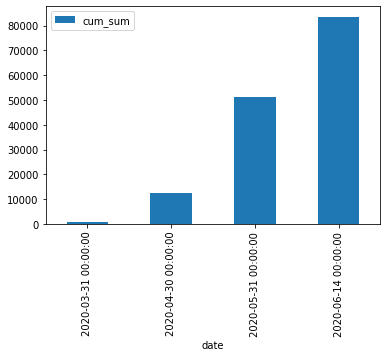

In [121]:
monthlySums = daily[daily['date'].isin(lastDates)]
# .iloc[:,[0,1,2,6,3]]
monthlySums[monthlySums['neighborhood']=='long beach'].iloc[:,[0,6]].sort_values('date').plot('date',kind='bar')

In [14]:
pop = pd.read_csv('LAtimesNeighborhoodPop.csv')
pop

,neighborhood,population
0,acton,6522
1,adams-normandie,17596
2,agoura-hills,20324
3,agua-dulce,3130
4,alhambra,85961
...,...,...
267,willowbrook,34336
268,wilmington,51517
269,windsor-square,5642
270,winnetka,46943


In [15]:
june['neighborhood'].unique()

NameError: name 'june' is not defined

In [16]:
# subgroup = pd.merge(pop, reg, left_on='neighborhood', right_on='place',how='inner')

In [16]:
import numpy as np
np.sort(daily['neighborhood'].unique())
daily

,date,neighborhood,confirmed_cases,population_x,Longitude,Latitude,new_cases
0,2021-01-23,acton,373,6522,-118.216138,34.481366,0
1,2021-01-22,acton,373,6522,-118.216138,34.481366,2
2,2021-01-21,acton,371,6522,-118.216138,34.481366,1
3,2021-01-20,acton,370,6522,-118.216138,34.481366,1
4,2021-01-19,acton,369,6522,-118.216138,34.481366,3
...,...,...,...,...,...,...,...
63872,2020-03-21,woodland hills,5,59661,-118.604522,34.166350,1
63873,2020-03-20,woodland hills,4,59661,-118.604522,34.166350,1
63874,2020-03-19,woodland hills,3,59661,-118.604522,34.166350,0
63875,2020-03-18,woodland hills,3,59661,-118.604522,34.166350,1


In [17]:
daily.to_csv('DailyInfection.csv')

In [79]:
commonPlace =[]
with open('neighborhoodOld.txt', 'r+') as f:
    for line in f.readlines():
        commonPlace.append(line.split('\n')[0])
len(commonPlace)

208

In [80]:
population = pd.DataFrame(daily.groupby('neighborhood').describe()['population']['mean']).reset_index()
population

,neighborhood,mean
0,acton,6522.0
1,adams normandie,17596.0
2,agoura hills,20324.0
3,agua dulce,3130.0
4,alhambra,85961.0
...,...,...
210,whittier,83838.0
211,willowbrook,34336.0
212,wilmington,51517.0
213,winnetka,46943.0


In [81]:
# import izip from itertools as zip
f_nei= open("neighborhood.txt","w+") 
f_pop= open("population.txt","w+") 
for a, b in population.itertuples(index=False):
     if(str(a) in commonPlace):
        print(a, int(b))
        f_nei.write(a+'\n')
        f_pop.write(str(int(b))+'\n')
f_nei.close()
f_pop.close()

acton 6522
adams normandie 17596
agoura hills 20324
agua dulce 3130
alhambra 85961
altadena 42680
arcadia 52951
arleta 31068
artesia 16380
athens 9101
atwater village 14888
avocado heights 17415
azusa 44384
baldwin park 75753
bel air 7691
bell 36667
bell gardens 44054
bellflower 72829
beverly crest 10852
beverly hills 33829
beverlywood 6080
bradbury 1268
brentwood 31344
burbank 100316
calabasas 23130
canoga park 53227
carthay 4866
castaic 16843
century city 5513
cerritos 51831
chatsworth 35073
cheviot hills 6945
chinatown 9610
claremont 35397
commerce 12583
compton 94384
covina 50954
cudahy 24208
culver city 38816
del aire 9039
del rey 28010
desert view highlands 2287
diamond bar 56784
downey 107323
downtown 27849
duarte 21486
eagle rock 32493
east hollywood 73967
east la mirada 9442
east los angeles 125897
east pasadena 6045
echo park 40455
el monte 116249
el segundo 15970
el sereno 40954
elizabeth lake 1379
elysian valley 7387
encino 41905
exposition park 31062
florence 43815
florenc

In [19]:
pops = []
with open('neighborhood.txt', 'r') as f:
    for line in f:
        pops.append(str(line).split('\n')[0])
pops
len(pops)

208

In [83]:
population = population.set_index('neighborhood').loc[pops,:]
population

,mean
neighborhood,
acton,6522.0
adams normandie,17596.0
agoura hills,20324.0
agua dulce,3130.0
alhambra,85961.0
...,...
whittier,83838.0
willowbrook,34336.0
wilmington,51517.0


In [84]:
f_pop= open("population.txt","w+") 
for a in list(population['mean']):
    print(a)
    f_pop.write(str(int(a))+'\n')
f_pop.close()
# list(population['mean'])

6522.0
17596.0
20324.0
3130.0
85961.0
42680.0
52951.0
31068.0
16380.0
9101.0
14888.0
17415.0
44384.0
75753.0
7691.0
36667.0
44054.0
72829.0
10852.0
33829.0
6080.0
1268.0
31344.0
100316.0
23130.0
53227.0
4866.0
16843.0
5513.0
51831.0
35073.0
6945.0
9610.0
35397.0
12583.0
94384.0
50954.0
24208.0
38816.0
9039.0
28010.0
2287.0
56784.0
107323.0
27849.0
21486.0
32493.0
73967.0
9442.0
125897.0
6045.0
40455.0
116249.0
15970.0
40954.0
1379.0
7387.0
41905.0
31062.0
43815.0
60154.0
57818.0
23467.0
195047.0
50177.0
50535.0
28381.0
53525.0
9804.0
23561.0
39688.0
18587.0
10297.0
14915.0
86265.0
18442.0
1875.0
57566.0
77818.0
21588.0
61370.0
36635.0
1008.0
112482.0
1472.0
23130.0
115070.0
20381.0
18507.0
6094.0
46782.0
41009.0
33117.0
6509.0
24238.0
571.0
11141.0
79412.0
120783.0
31729.0
11782.0
22950.0
1374.0
26616.0
1388.0
19984.0
35238.0
69899.0
12514.0
11594.0
34039.0
35492.0
8302.0
28083.0
52197.0
18237.0
36817.0
61960.0
59933.0
53095.0
77848.0
4351.0
57561.0
103223.0
23940.0
75014.0
117432.0
42

In [85]:
daily

,date,neighborhood,confirmed_cases,population,Longitude,Latitude,new_cases
0,2020-08-05,acton,46,6522,-118.216138,34.481366,1
1,2020-08-04,acton,45,6522,-118.216138,34.481366,0
2,2020-08-03,acton,45,6522,-118.216138,34.481366,0
3,2020-08-02,acton,45,6522,-118.216138,34.481366,1
4,2020-08-01,acton,44,6522,-118.216138,34.481366,0
...,...,...,...,...,...,...,...
27694,2020-03-21,woodland hills,5,59661,-118.604522,34.166350,1
27695,2020-03-20,woodland hills,4,59661,-118.604522,34.166350,1
27696,2020-03-19,woodland hills,3,59661,-118.604522,34.166350,0
27697,2020-03-18,woodland hills,3,59661,-118.604522,34.166350,1


In [20]:
k = daily.iloc[:,[0,1,2]]
k = k[k['neighborhood'].isin(pops)]
k
newK = k.pivot(index='neighborhood', columns='date', values='confirmed_cases').fillna(0)
newK=newK.astype(int)
newK

date,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,...,2021-01-14,2021-01-15,2021-01-16,2021-01-17,2021-01-18,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-23
neighborhood,,,,,,,,,,,,,,,,,,,,,
acton,0,0,0,0,0,0,0,0,0,0,...,342,350,358,361,366,369,370,371,373,373
adams normandie,0,0,0,0,0,0,0,0,0,0,...,922,931,944,951,962,973,974,987,994,1017
agoura hills,0,0,0,0,0,0,0,1,3,3,...,733,751,761,775,780,783,797,801,810,820
agua dulce,0,0,0,0,0,0,0,0,0,0,...,176,178,180,181,188,190,190,191,195,197
alhambra,2,1,1,2,3,3,3,4,5,6,...,5355,5445,5531,5595,5649,5692,5722,5772,5825,5876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
whittier,0,0,0,2,2,2,2,2,3,3,...,8925,9028,9139,9220,9295,9358,9417,9485,9573,9636
willowbrook,0,0,0,0,0,0,0,0,1,1,...,4866,4945,5010,5050,5105,5137,5154,5198,5254,5291
wilmington,0,0,0,0,0,0,1,3,4,4,...,6296,6405,6547,6630,6750,6799,6838,6889,6937,7037


In [87]:
newK.to_csv('infectionData.txt', header=None, index=None, sep=',')

In [21]:
#new cases
k = daily.iloc[:,[0,1,6]]
k = k[k['neighborhood'].isin(pops)]
k
newK = k.pivot(index='neighborhood', columns='date', values='new_cases').fillna(0)
newK=newK.astype(int)
newK
newK.to_csv('NewCaseInfectionData.txt', header=None, index=None, sep=',')

In [89]:
newK

date,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,...,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05
neighborhood,,,,,,,,,,,,,,,,,,,,,
acton,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,0,1,0,0,1
adams normandie,0,0,0,0,0,0,0,0,0,0,...,2,3,6,2,3,4,1,0,4,2
agoura hills,0,0,0,0,0,0,0,0,2,0,...,0,1,7,2,2,6,1,0,1,0
agua dulce,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
alhambra,0,0,0,1,1,0,0,1,1,1,...,8,28,33,11,13,16,10,6,10,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
whittier,0,0,0,0,0,0,0,0,1,0,...,12,14,24,17,32,14,6,8,10,14
willowbrook,0,0,0,0,0,0,0,0,0,0,...,9,29,22,17,14,18,5,10,8,6
wilmington,0,0,0,0,0,0,0,2,1,0,...,14,13,22,29,22,23,4,9,13,11


In [75]:

# np.sort(daily.new_cases.unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  95,  96,  97,  98,  99, 101, 102, 103, 104, 105, 109,
       110, 111, 114, 115, 116, 118, 123, 125, 127, 130, 132, 134, 135,
       138, 142, 143, 145, 146, 149, 150, 151, 154, 156, 162, 164, 184,
       189, 193, 195, 214, 220, 228, 231, 233, 254, 256, 292, 311, 313,
       321])